In [1]:
# CRISP-DM Data Understanding, Data Cleaning and Preprocessing
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder

# Load the dataset
initial_df = pd.read_csv('data/NYPD_Complaint_Data_Historic.csv')

initial_df.info()

/var/folders/7b/c18lkd_95v345lvvmts66_k40000gn/T/ipykernel_89919/2413300020.py:15: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  initial_df = pd.read_csv('data/NYPD_Complaint_Data_Historic.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8914838 entries, 0 to 8914837
Data columns (total 35 columns):
 #   Column             Dtype  
---  ------             -----  
 0   CMPLNT_NUM         object 
 1   CMPLNT_FR_DT       object 
 2   CMPLNT_FR_TM       object 
 3   CMPLNT_TO_DT       object 
 4   CMPLNT_TO_TM       object 
 5   ADDR_PCT_CD        float64
 6   RPT_DT             object 
 7   KY_CD              int64  
 8   OFNS_DESC          object 
 9   PD_CD              float64
 10  PD_DESC            object 
 11  CRM_ATPT_CPTD_CD   object 
 12  LAW_CAT_CD         object 
 13  BORO_NM            object 
 14  LOC_OF_OCCUR_DESC  object 
 15  PREM_TYP_DESC      object 
 16  JURIS_DESC         object 
 17  JURISDICTION_CODE  int64  
 18  PARKS_NM           object 
 19  HADEVELOPT         object 
 20  HOUSING_PSA        object 
 21  X_COORD_CD         float64
 22  Y_COORD_CD         float64
 23  SUSP_AGE_GROUP     object 
 24  SUSP_RACE          object 
 25  SUSP_SEX          

In [2]:
initial_df.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,...,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
0,25640826H10611,12/05/2006,10:38:00,NaN,(null),NaN,12/05/2006,101,MURDER & NON-NEGL. MANSLAUGHTER,NaN,...,(null),NaN,NaN,NaN,NaN,PATROL BORO QUEENS NORTH,(null),25-44,WHITE HISPANIC,M
1,16631501H8965,08/25/1973,12:15:00,NaN,(null),NaN,05/29/2006,101,MURDER & NON-NEGL. MANSLAUGHTER,NaN,...,(null),NaN,NaN,NaN,NaN,PATROL BORO MAN NORTH,(null),45-64,BLACK,F
2,11118212H8714,04/22/2006,16:50:00,NaN,(null),NaN,04/22/2006,101,MURDER & NON-NEGL. MANSLAUGHTER,NaN,...,(null),NaN,NaN,NaN,NaN,PATROL BORO BKLYN SOUTH,(null),45-64,BLACK,M
3,23471265H9399,07/20/2006,22:37:00,NaN,(null),NaN,07/20/2006,101,MURDER & NON-NEGL. MANSLAUGHTER,NaN,...,(null),NaN,NaN,NaN,NaN,PATROL BORO BKLYN SOUTH,(null),18-24,BLACK,M
4,24565927H10142,04/14/2006,02:37:00,NaN,(null),NaN,04/14/2006,101,MURDER & NON-NEGL. MANSLAUGHTER,NaN,...,(null),NaN,NaN,NaN,NaN,PATROL BORO BKLYN NORTH,(null),45-64,BLACK,M


In [3]:
# Data Preparation, Cleaning and Preprocessing
# Define columns to drop
columns_to_drop = ['LAW_CAT_CD', 'CMPLNT_NUM', 'CMPLNT_TO_DT', 'CMPLNT_TO_TM', 'PD_CD', 'PD_DESC', 'CRM_ATPT_CPTD_CD', 
                   'JURIS_DESC', 'JURISDICTION_CODE', 'PARKS_NM', 'HADEVELOPT', 'HOUSING_PSA', 'LOC_OF_OCCUR_DESC', 
                   'RPT_DT', 'X_COORD_CD', 'Y_COORD_CD', 'TRANSIT_DISTRICT', 'Lat_Lon', 'KY_CD', 'ADDR_PCT_CD', 'STATION_NAME',
                   'SUSP_AGE_GROUP', 'SUSP_RACE', 'SUSP_SEX', 'PATROL_BORO']

# Drop the columns
initial_df = initial_df.drop(columns=columns_to_drop)
initial_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8914838 entries, 0 to 8914837
Data columns (total 10 columns):
 #   Column         Dtype  
---  ------         -----  
 0   CMPLNT_FR_DT   object 
 1   CMPLNT_FR_TM   object 
 2   OFNS_DESC      object 
 3   BORO_NM        object 
 4   PREM_TYP_DESC  object 
 5   Latitude       float64
 6   Longitude      float64
 7   VIC_AGE_GROUP  object 
 8   VIC_RACE       object 
 9   VIC_SEX        object 
dtypes: float64(2), object(8)
memory usage: 680.1+ MB


In [4]:
initial_df.head()

,CMPLNT_FR_DT,CMPLNT_FR_TM,OFNS_DESC,BORO_NM,PREM_TYP_DESC,Latitude,Longitude,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
0,12/05/2006,10:38:00,MURDER & NON-NEGL. MANSLAUGHTER,QUEENS,(null),NaN,NaN,25-44,WHITE HISPANIC,M
1,08/25/1973,12:15:00,MURDER & NON-NEGL. MANSLAUGHTER,MANHATTAN,MULTI DWELL - APT BUILD,NaN,NaN,45-64,BLACK,F
2,04/22/2006,16:50:00,MURDER & NON-NEGL. MANSLAUGHTER,BROOKLYN,(null),NaN,NaN,45-64,BLACK,M
3,07/20/2006,22:37:00,MURDER & NON-NEGL. MANSLAUGHTER,BROOKLYN,(null),NaN,NaN,18-24,BLACK,M
4,04/14/2006,02:37:00,MURDER & NON-NEGL. MANSLAUGHTER,BROOKLYN,(null),NaN,NaN,45-64,BLACK,M


In [5]:
initial_df = initial_df.dropna(subset=['Latitude', 'Longitude'])

# Print the number of rows before and after cleaning
print(f"Data size after removing rows with NaN in Latitude or Longitude: {initial_df.shape}")
initial_df.head()

Data size after removing rows with NaN in Latitude or Longitude: (8914372, 10)


,CMPLNT_FR_DT,CMPLNT_FR_TM,OFNS_DESC,BORO_NM,PREM_TYP_DESC,Latitude,Longitude,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
8,12/05/2006,11:38:00,ROBBERY,MANHATTAN,BANK,40.741731,-73.989447,(null),UNKNOWN,D
9,07/12/2006,14:16:00,ARSON,BROOKLYN,RESIDENCE-HOUSE,40.689592,-73.940805,45-64,BLACK,M
10,11/26/2006,16:00:00,ARSON,BROOKLYN,RESIDENCE-HOUSE,40.676671,-73.931768,18-24,BLACK,F
12,11/21/2006,02:00:00,ROBBERY,BRONX,STREET,40.850992,-73.827426,65+,WHITE,M
29,09/01/2007,09:45:00,ROBBERY,MANHATTAN,BANK,40.707632,-74.011479,(null),UNKNOWN,D


In [6]:


# Replace '(null)' with NaN
initial_df.replace('(null)', np.nan, inplace=True)

# Replace 'UNKNOWN' with NaN
initial_df.replace('UNKNOWN', np.nan, inplace=True)

# Count the number of NaN values per column
nan_counts = initial_df.isna().sum()

# Print the NaN counts
print(nan_counts)

CMPLNT_FR_DT         655
CMPLNT_FR_TM          48
OFNS_DESC          18883
BORO_NM             7884
PREM_TYP_DESC      38565
Latitude               0
Longitude              0
VIC_AGE_GROUP    2749049
VIC_RACE         2894393
VIC_SEX              308
dtype: int64


In [7]:
# List of columns to check for NaN values
columns_to_check = ['CMPLNT_FR_DT', 'CMPLNT_FR_TM', 'OFNS_DESC', 'BORO_NM', 'PREM_TYP_DESC', 'VIC_RACE', 'VIC_SEX', 'VIC_AGE_GROUP']

# Drop rows with NaN in any of the specified columns
initial_df = initial_df.dropna(subset=columns_to_check)

# Count the number of NaN values per column
nan_counts = initial_df.isna().sum()

# Print the NaN counts
print(nan_counts)

# Print the shape of the DataFrame to see how many rows were dropped
print(f"Original data size: {initial_df.shape}")
print(f"Cleaned data size: {initial_df.shape}")

CMPLNT_FR_DT     0
CMPLNT_FR_TM     0
OFNS_DESC        0
BORO_NM          0
PREM_TYP_DESC    0
Latitude         0
Longitude        0
VIC_AGE_GROUP    0
VIC_RACE         0
VIC_SEX          0
dtype: int64
Original data size: (5878173, 10)
Cleaned data size: (5878173, 10)


In [8]:
complaints_df = initial_df

complaints_df.head()

,CMPLNT_FR_DT,CMPLNT_FR_TM,OFNS_DESC,BORO_NM,PREM_TYP_DESC,Latitude,Longitude,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
9,07/12/2006,14:16:00,ARSON,BROOKLYN,RESIDENCE-HOUSE,40.689592,-73.940805,45-64,BLACK,M
10,11/26/2006,16:00:00,ARSON,BROOKLYN,RESIDENCE-HOUSE,40.676671,-73.931768,18-24,BLACK,F
12,11/21/2006,02:00:00,ROBBERY,BRONX,STREET,40.850992,-73.827426,65+,WHITE,M
30,12/10/2007,16:05:00,HARRASSMENT 2,MANHATTAN,STREET,40.724820,-73.998965,25-44,WHITE,M
32,12/25/2007,03:30:00,FELONY ASSAULT,BROOKLYN,STREET,40.679636,-73.949583,18-24,BLACK,M


In [9]:
# Remove older data
# Data after 2010 is more likely to reflect current trends, patterns, and conditions that are 
# relevant for modern analysis.
# Data quality may have improved after 2010.
# The real estate market and property values have likely evolved significantly after 2010
# Convert CMPLNT_FR_DT to datetime
# Reducing the dataset to only records after 2010 helps in managing the volume of data
# Alignment with Other Datasets

complaints_df['CMPLNT_FR_DT'] = pd.to_datetime(complaints_df['CMPLNT_FR_DT'], errors='coerce')

# Filter out records before 01/01/2010
complaints_df = complaints_df[complaints_df['CMPLNT_FR_DT'] >= '2010-01-01']

print(f"Filtered data size after removing records before 2010: {complaints_df.shape[0]}")


complaints_df = complaints_df.drop(columns=['CMPLNT_FR_DT'])

complaints_df.head()

Filtered data size after removing records before 2010: 4534922


,CMPLNT_FR_TM,OFNS_DESC,BORO_NM,PREM_TYP_DESC,Latitude,Longitude,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
61,12:30:00,BURGLARY,BROOKLYN,OTHER,40.732448,-73.953310,45-64,WHITE,M
63,06:00:00,ROBBERY,BRONX,STREET,40.821008,-73.901069,25-44,BLACK,M
65,03:04:00,FELONY ASSAULT,BRONX,STREET,40.832542,-73.864116,18-24,BLACK,M
67,04:00:00,RAPE,BRONX,STREET,40.887314,-73.847272,18-24,BLACK,F
69,20:15:00,HARRASSMENT 2,MANHATTAN,STREET,40.811255,-73.942946,45-64,BLACK,F


Chi-Square Statistic: 289799.9782159478
p-value: 0.0


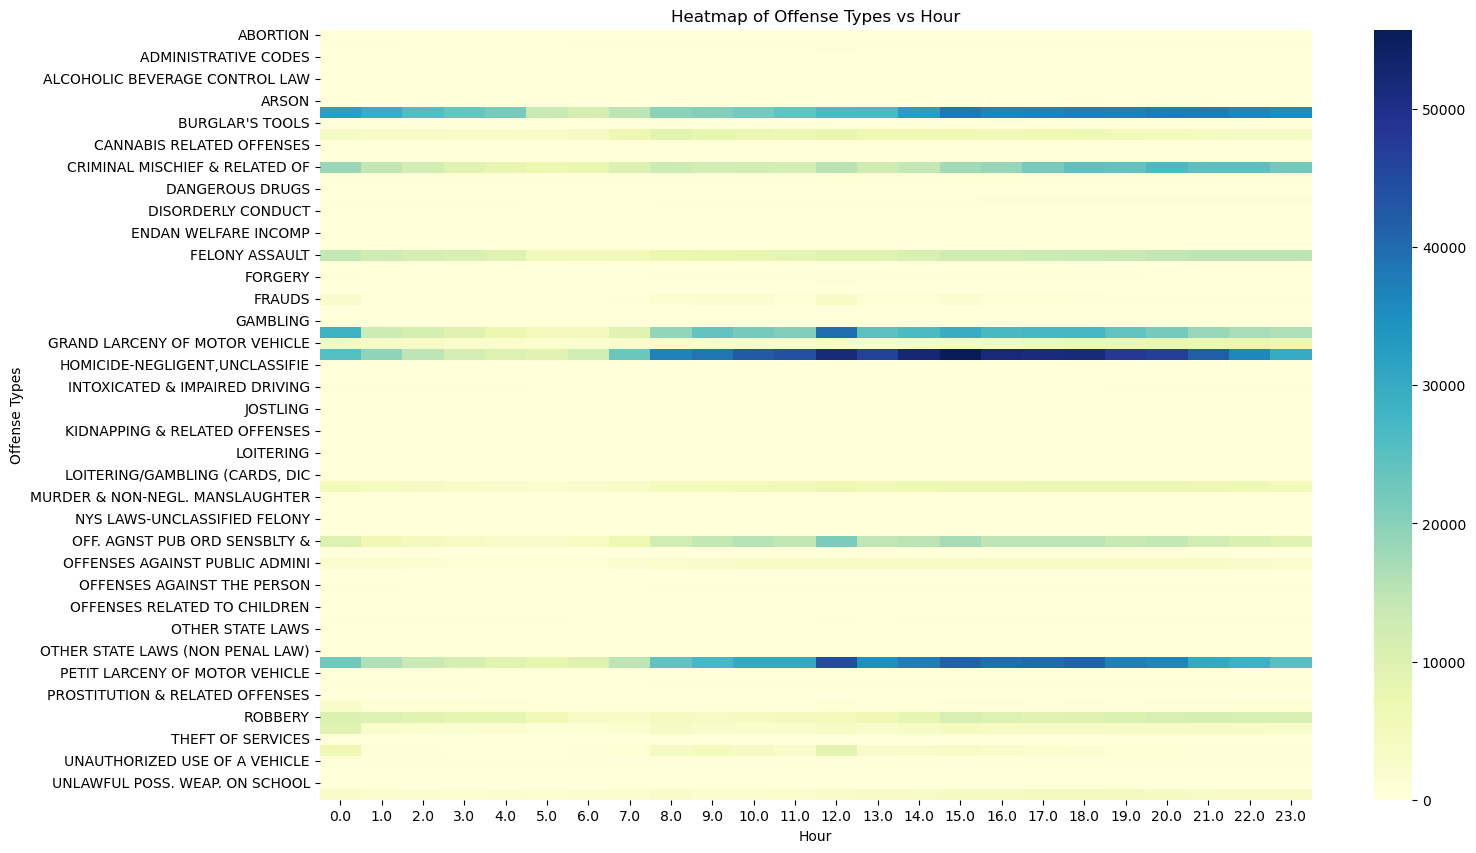

In [10]:
# Hypothesis: The occurrence of offenses (OFNS_DESC) is independent of the time of day (CMPLNT_FR_TM).
# This hypothesis examines whether certain types of crimes are more likely to occur at specific times of the day. 
# If rejected, it could suggest that some crimes are more prevalent during certain hours.


# Extract the hour from the time column using .loc to avoid the warning
complaints_df.loc[:, 'Hour'] = complaints_df['CMPLNT_FR_TM'].str.split(':').str[0].astype(float)

complaints_df = complaints_df.drop(columns=['CMPLNT_FR_TM'])

# Create a contingency table of OFNS_DESC vs Hour
contingency_table = pd.crosstab(complaints_df['OFNS_DESC'], complaints_df['Hour'])

# Perform Chi-Square test
chi2_stat, p_val, dof, ex = chi2_contingency(contingency_table)

# Print the results
print(f"Chi-Square Statistic: {chi2_stat}")
print(f"p-value: {p_val}")

# Creating the heatmap from the contingency table
plt.figure(figsize=(16, 10))
sns.heatmap(contingency_table, cmap="YlGnBu", annot=False, fmt="d")
plt.title('Heatmap of Offense Types vs Hour')
plt.xlabel('Hour')
plt.ylabel('Offense Types')
plt.show()

In [11]:
# p-value is low: this means there is a statistically significant relationship
# data suggests that the type of offense is not independent of the time of day it occurs; 
# certain offenses are more likely to occur at specific times.

In [12]:
# Map Crimes to a severity
# Read the CSV file into a DataFrame
severity_df = pd.read_csv('data/offense_severity_scores.csv')

severity_dict = severity_df.set_index('Offense')['Severity_Score'].to_dict()
complaints_df['OFNS_DESC_Severity_Score'] = complaints_df['OFNS_DESC'].map(severity_dict)

# Print the updated DataFrame to verify
complaints_df.head()

,OFNS_DESC,BORO_NM,PREM_TYP_DESC,Latitude,Longitude,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,Hour,OFNS_DESC_Severity_Score
61,BURGLARY,BROOKLYN,OTHER,40.732448,-73.953310,45-64,WHITE,M,12.0,7
63,ROBBERY,BRONX,STREET,40.821008,-73.901069,25-44,BLACK,M,6.0,8
65,FELONY ASSAULT,BRONX,STREET,40.832542,-73.864116,18-24,BLACK,M,3.0,9
67,RAPE,BRONX,STREET,40.887314,-73.847272,18-24,BLACK,F,4.0,10
69,HARRASSMENT 2,MANHATTAN,STREET,40.811255,-73.942946,45-64,BLACK,F,20.0,2


In [15]:
import pandas as pd
from pymongo import MongoClient
from tqdm.notebook import tqdm  # Use the notebook version of tqdm for better integration

# Constants for MongoDB connection and geospatial calculations
MONGO_URI = 'mongodb://localhost:27017/'
DB_NAME = 'property_database'
COLLECTION_NAME = 'properties'
RADIUS_METERS = 1000

# Load your DataFrame (assuming complaints_df is already loaded)
# complaints_df = pd.read_csv('path_to_your_complaints_data.csv')

# Define the combined function
def add_property_price_data(row, mongo_uri=MONGO_URI, db_name=DB_NAME, collection_name=COLLECTION_NAME, radius_meters=RADIUS_METERS):
    """
    For a given row with latitude and longitude, calculate the average property metrics
    within a specified radius and return them as a series.

    Parameters:
    row (Series): A pandas DataFrame row containing 'Latitude' and 'Longitude'.
    mongo_uri (str): MongoDB URI.
    db_name (str): Name of the database.
    collection_name (str): Name of the collection.
    radius_meters (int): Radius in meters for the geospatial query.

    Returns:
    Series: Contains average property price, average price per bed, and average price per square foot.
    """
    # Establish a connection to MongoDB
    client = MongoClient(mongo_uri)
    
    # Specify the database and collection
    db = client[db_name]
    collection = db[collection_name]
    
    # Extract latitude and longitude from the row
    lat = row['Latitude']
    lng = row['Longitude']
    
    # Define the aggregation pipeline
    pipeline = [
        {
            '$geoNear': {
                'near': {'type': 'Point', 'coordinates': [lng, lat]},
                'distanceField': 'distance',
                'spherical': True,
                'maxDistance': radius_meters  # Use the radius in meters directly
            }
        },
        {
            '$group': {
                '_id': None,
                'average_price': {'$avg': '$PRICE'},
                'average_price_per_bed': {'$avg': '$PRICE_PER_BED'},
                'average_price_per_sqft': {'$avg': '$PRICE_PER_PROPERTYSQFT'}
            }
        }
    ]

    # Execute the aggregation
    result = list(collection.aggregate(pipeline))

    # Return the average metrics if result is found, else return None
    if result:
        return pd.Series([result[0].get('average_price', None),
                          result[0].get('average_price_per_bed', None),
                          result[0].get('average_price_per_sqft', None)])
    else:
        return pd.Series([None, None, None])

# Apply the function to each row of the DataFrame with tqdm for progress tracking
tqdm.pandas(desc="Processing Property Data")
complaints_df[['Average_Property_Price', 'Average_Price_Per_Bed', 'Average_Price_Per_SqFt']] = \
    complaints_df.progress_apply(add_property_price_data, axis=1)

# Display the updated DataFrame to verify
display(complaints_df.head())

# Save the updated DataFrame to a CSV file
output_filename = 'data/updated_complaints_data.csv'
complaints_df.to_csv(output_filename, index=False)

print(f"The updated DataFrame has been written to {output_filename}.")

Processing Property Data:   0%|          | 0/4534922 [00:00<?, ?it/s]

,OFNS_DESC,BORO_NM,PREM_TYP_DESC,Latitude,Longitude,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,Hour,OFNS_DESC_Severity_Score,Average_Property_Price,Average_Price_Per_Bed,Average_Price_Per_SqFt
61,BURGLARY,1,55,40.732448,-73.953310,99,4,4,12.0,7,1.023333e+06,530000.000000,1294.152099
63,ROBBERY,0,78,40.821008,-73.901069,98,2,4,6.0,8,3.783331e+05,129740.666667,250.610322
65,FELONY ASSAULT,0,78,40.832542,-73.864116,97,2,4,3.0,9,5.151706e+05,152872.408964,313.675991
67,RAPE,0,78,40.887314,-73.847272,97,2,2,4.0,10,6.485616e+05,179104.178571,343.623801
69,HARRASSMENT 2,2,78,40.811255,-73.942946,99,2,2,20.0,2,8.066429e+05,406826.190476,561.204140


The updated DataFrame has been written to updated_complaints_data.csv.


In [23]:
# Assuming complaints_df is your DataFrame
complaints_df = pd.read_csv('data/updated_complaints_data.csv')

# Count the number of NaN values per column
nan_counts = complaints_df.isna().sum()

# Print the NaN counts
print(nan_counts)

complaints_df = complaints_df.dropna()

# Count the number of NaN values per column
nan_counts = complaints_df.isna().sum()

# Print the NaN counts
print(nan_counts)

output_filename = 'data/updated_complaints_data_cleaned.csv'
complaints_df.to_csv(output_filename, index=False)

OFNS_DESC                       0
BORO_NM                         0
PREM_TYP_DESC                   0
Latitude                        0
Longitude                       0
VIC_AGE_GROUP                   0
VIC_RACE                        0
VIC_SEX                         0
Hour                            0
OFNS_DESC_Severity_Score        0
Average_Property_Price      29545
Average_Price_Per_Bed       29545
Average_Price_Per_SqFt      29545
dtype: int64


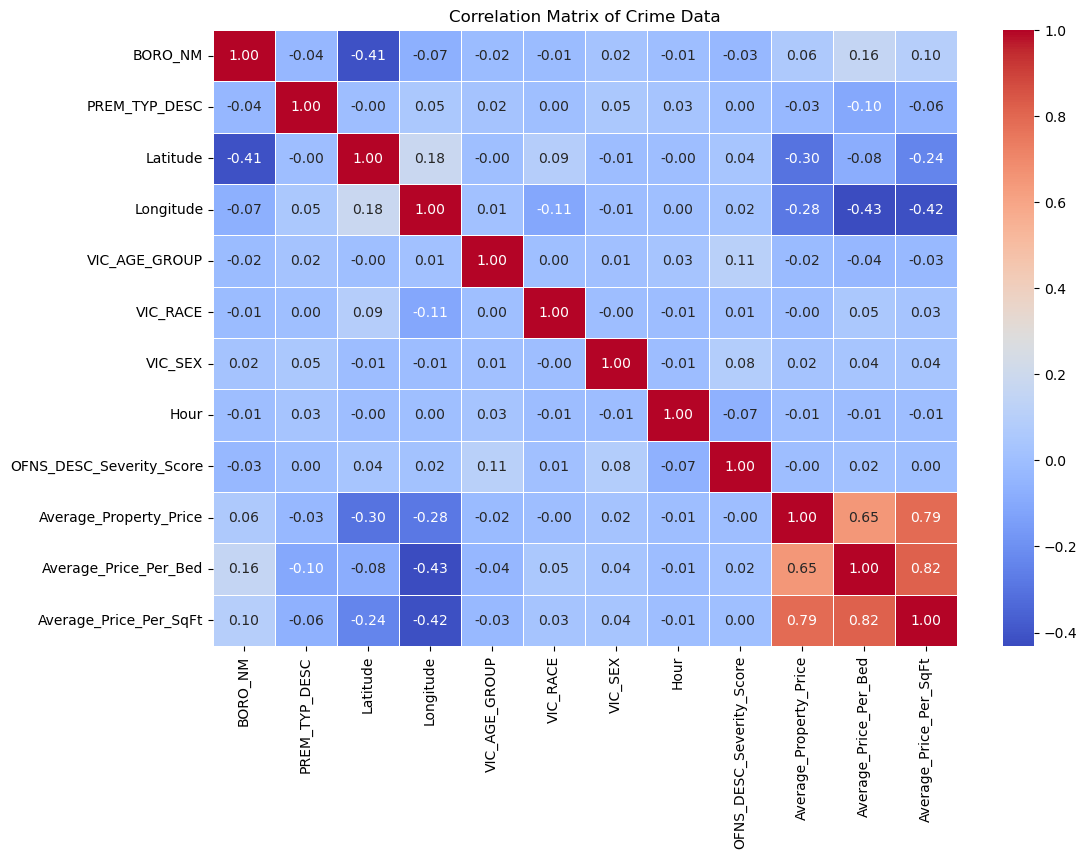

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Load your cleaned data
# Assuming 'complaints_df' is your DataFrame

# Convert categorical columns to numeric using Label Encoding
label_encoders = {}
for column in ['BORO_NM', 'PREM_TYP_DESC', 'VIC_AGE_GROUP', 'VIC_RACE', 'VIC_SEX']:
    le = LabelEncoder()
    complaints_df[column] = le.fit_transform(complaints_df[column])
    label_encoders[column] = le  # Store the label encoder for later use if needed

# Now create the correlation matrix
correlation_matrix = complaints_df[['BORO_NM', 'PREM_TYP_DESC', 
                                    'Latitude', 'Longitude', 'VIC_AGE_GROUP', 'VIC_RACE', 
                                    'VIC_SEX', 'Hour', 'OFNS_DESC_Severity_Score', 
                                    'Average_Property_Price', 'Average_Price_Per_Bed', 'Average_Price_Per_SqFt']].corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Crime Data')
plt.show()

In [ ]:
# Latitude and longitude show some correlation with the average property prices. 
# This suggests that location (i.e., where the crimes occurred) could have an impact on property values.

# OFNS_DESC_Severity_Score has a moderate correlation with property price metrics. 
# This could be an area worth exploring further, particularly if you want to see if more 
# severe crimes correlate with lower property values.



In [24]:
# Step 1: Create Interaction Terms
complaints_df['Hour_Severity_Interaction'] = complaints_df['Hour'] * complaints_df['OFNS_DESC_Severity_Score']

# Step 2: Prepare Data for Regression
# We'll use the property price per square foot as the target variable
X = complaints_df[['Hour', 'OFNS_DESC_Severity_Score', 'Hour_Severity_Interaction', 'Latitude', 'Longitude']]
y = complaints_df['Average_Price_Per_SqFt']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict using the trained model
y_pred = model.predict(X_test)

# Step 3: Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Print model coefficients
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

# Print the intercept
print(f'Intercept: {model.intercept_}')

# You might also want to save the results to review them later
coefficients.to_csv('interaction_model_coefficients.csv')

Mean Squared Error: 24948.270034358466
R-squared: 0.18677663495717034
                           Coefficient
Hour                         -0.186139
OFNS_DESC_Severity_Score      0.815740
Hour_Severity_Interaction     0.017368
Latitude                   -244.994266
Longitude                  -849.534896
Intercept: -52341.05076828936


/Users/markfinlay/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


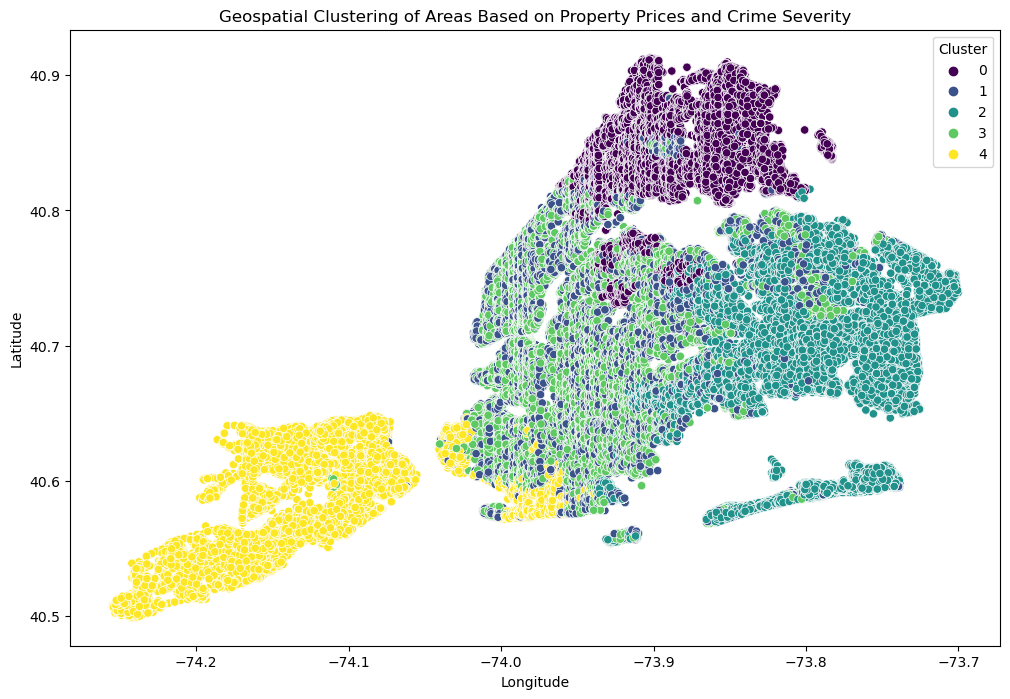

         Average_Property_Price  OFNS_DESC_Severity_Score
Cluster                                                  
0                 540256.727304                  4.678834
1                 881584.489782                  7.216046
2                 613045.465132                  4.346651
3                 914223.746823                  2.792563
4                 674430.740069                  4.121534


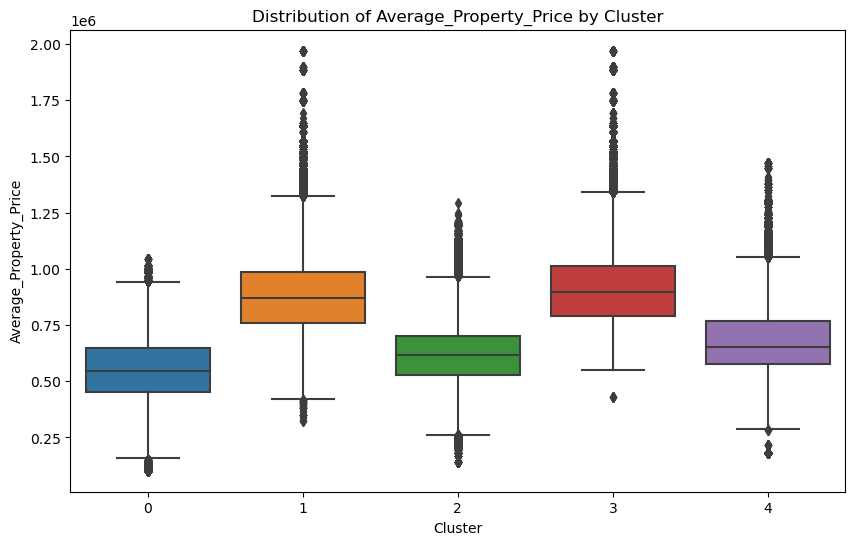

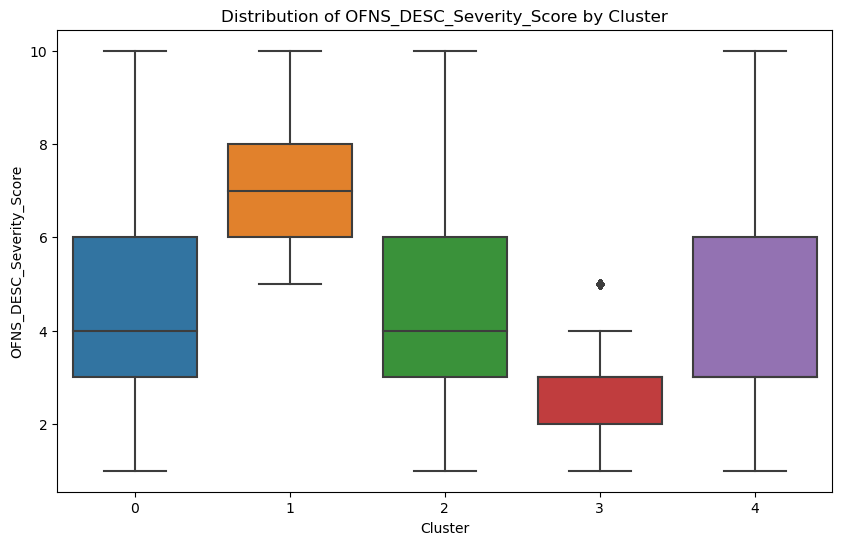

In [25]:
# Since latitude and longitude are significant predictors, lets use geospatial clustering (e.g., K-Means) 
# to explore how geographical areas cluster with respect to property prices and crime severity.

import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure that you have your DataFrame with the necessary columns: 'Latitude', 'Longitude', 'Average_Property_Price', 'OFNS_DESC_Severity_Score'
# You may need to normalize these features if they are on different scales.

# Example: Normalize the data
from sklearn.preprocessing import StandardScaler

features = ['Latitude', 'Longitude', 'Average_Property_Price', 'OFNS_DESC_Severity_Score']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(complaints_df[features])

# Convert scaled data back to DataFrame for easy handling
X_scaled_df = pd.DataFrame(X_scaled, columns=features)

# Apply K-Means
kmeans = KMeans(n_clusters=5, random_state=42)  # Adjust n_clusters to suit your data
kmeans.fit(X_scaled_df)

# Add cluster labels to the original DataFrame
complaints_df['Cluster'] = kmeans.labels_

# Scatter plot for clusters based on geographical coordinates
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Longitude', y='Latitude', hue='Cluster', data=complaints_df, palette='viridis', legend='full')
plt.title('Geospatial Clustering of Areas Based on Property Prices and Crime Severity')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Cluster')
plt.show()

# Descriptive statistics for each cluster
cluster_summary = complaints_df.groupby('Cluster')[['Average_Property_Price', 'OFNS_DESC_Severity_Score']].mean()
print(cluster_summary)

# Visualize the distribution of Average Property Price and Crime Severity for each cluster
for feature in ['Average_Property_Price', 'OFNS_DESC_Severity_Score']:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Cluster', y=feature, data=complaints_df)
    plt.title(f'Distribution of {feature} by Cluster')
    plt.show()

